# 1. Data Exploration


In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [6]:

origin_data = pd.read_csv('heart_2022_with_nans.csv')
data = origin_data
data

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


## Number of data samples and types of attributes

In [8]:
print("Number of samples:", data.shape[0])
print("Number of attributes:", data.shape[1])

Number of samples: 445132
Number of attributes: 40


## First few rows of the dataset:

In [10]:
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


## Types of attributes

In [12]:
data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [13]:
data.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

## Feature Description

| **Feature**                    | **Description**                                                                         |
|--------------------------------|-----------------------------------------------------------------------------------------|
| **State**                      | U.S. states where the data was collected.                                               |
| **Sex**                        | Gender of the respondent (Male/Female).                                                 |
| **GeneralHealth**              | Self-reported overall health status of the respondent.                                  |
| **PhysicalHealthDays**         | Number of days the respondent engaged in physical activities in the past 30 days.       |
| **MentalHealthDays**           | Number of days the respondent received psychological health treatment in the past 30 days. |
| **LastCheckupTime**            | Time since the respondent's last medical check-up.                                      |
| **PhysicalActivities**         | Frequency of physical exercise by the respondent.                                       |
| **SleepHours**                 | Average hours of sleep per night reported by the respondent.                            |
| **RemovedTeeth**               | Indicates whether the respondent has had teeth removed due to decay or disease.         |
| **HadHeartAttack**             | Indicates whether the respondent has ever had a heart attack (Yes/No).                  |
| **HadAngina**                  | Indicates whether the respondent has experienced chest pain or angina.                  |
| **HadStroke**                  | Indicates whether the respondent has ever had a stroke (Yes/No).                        |
| **HadAsthma**                  | Indicates whether the respondent has ever been diagnosed with asthma.                   |
| **HadSkinCancer**              | Indicates whether the respondent has ever been diagnosed with skin cancer.              |
| **HadCOPD**                    | Indicates whether the respondent has ever been diagnosed with chronic obstructive pulmonary disease (COPD). |
| **HadDepressiveDisorder**      | Indicates whether the respondent has ever been diagnosed with depression.               |
| **HadKidneyDisease**           | Indicates whether the respondent has ever been diagnosed with kidney disease.           |
| **HadArthritis**               | Indicates whether the respondent has ever been diagnosed with arthritis.                |
| **HadDiabetes**                | Indicates whether the respondent has ever been diagnosed with diabetes.                 |
| **DeafOrHardOfHearing**        | Indicates whether the respondent is deaf or hard of hearing.                            |
| **BlindOrVisionDifficulty**    | Indicates whether the respondent has difficulty seeing or is blind.                     |
| **DifficultyConcentrating**    | Indicates whether the respondent has difficulty concentrating.                          |
| **DifficultyWalking**          | Indicates whether the respondent has difficulty walking.                                |
| **DifficultyDressingBathing**  | Indicates whether the respondent has difficulty dressing or bathing.                    |
| **DifficultyErrands**          | Indicates whether the respondent has difficulty running errands independently.          |
| **SmokerStatus**               | Smoking status of the respondent (Current smoker/Former smoker/Never smoked).           |
| **ECigaretteUsage**            | Indicates whether the respondent uses e-cigarettes.                                     |
| **ChestScan**                  | Indicates whether the respondent has had a chest scan or imaging test.                  |
| **RaceEthnicityCategory**      | Racial or ethnic background of the respondent (e.g., Black, White, Asian, Hispanic).    |
| **AgeCategory**                | Age group of the respondent (e.g., 18-24, 25-34, 35-44, etc.).                          |
| **HeightInMeters**             | Height of the respondent in meters.                                                     |
| **WeightInKilograms**          | Weight of the respondent in kilograms.                                                  |
| **BMI**                        | Body Mass Index, calculated as weight in kilograms divided by height in meters squared. |
| **AlcoholDrinkers**            | Indicates whether the respondent consumes alcohol.                                      |
| **HIVTesting**                 | Indicates whether the respondent has been tested for HIV.                               |
| **FluVaxLast12**               | Indicates whether the respondent received a flu vaccine in the last 12 months.          |
| **PneumoVaxEver**              | Indicates whether the respondent has ever received a pneumococcal vaccine.              |
| **TetanusLast10Tdap**          | Indicates whether the respondent has received a tetanus vaccine in the last 10 years.   |
| **HighRiskLastYear**           | Indicates whether the respondent was at high risk for health issues in the last year.   |
| **CovidPos**                   | Indicates whether the respondent has tested positive for COVID-19.                      |


## Statistical information for numerical attributes

In [16]:
data.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


# 2. Data Visualization


## Histograms for numerical features

Histograms of all attributes:


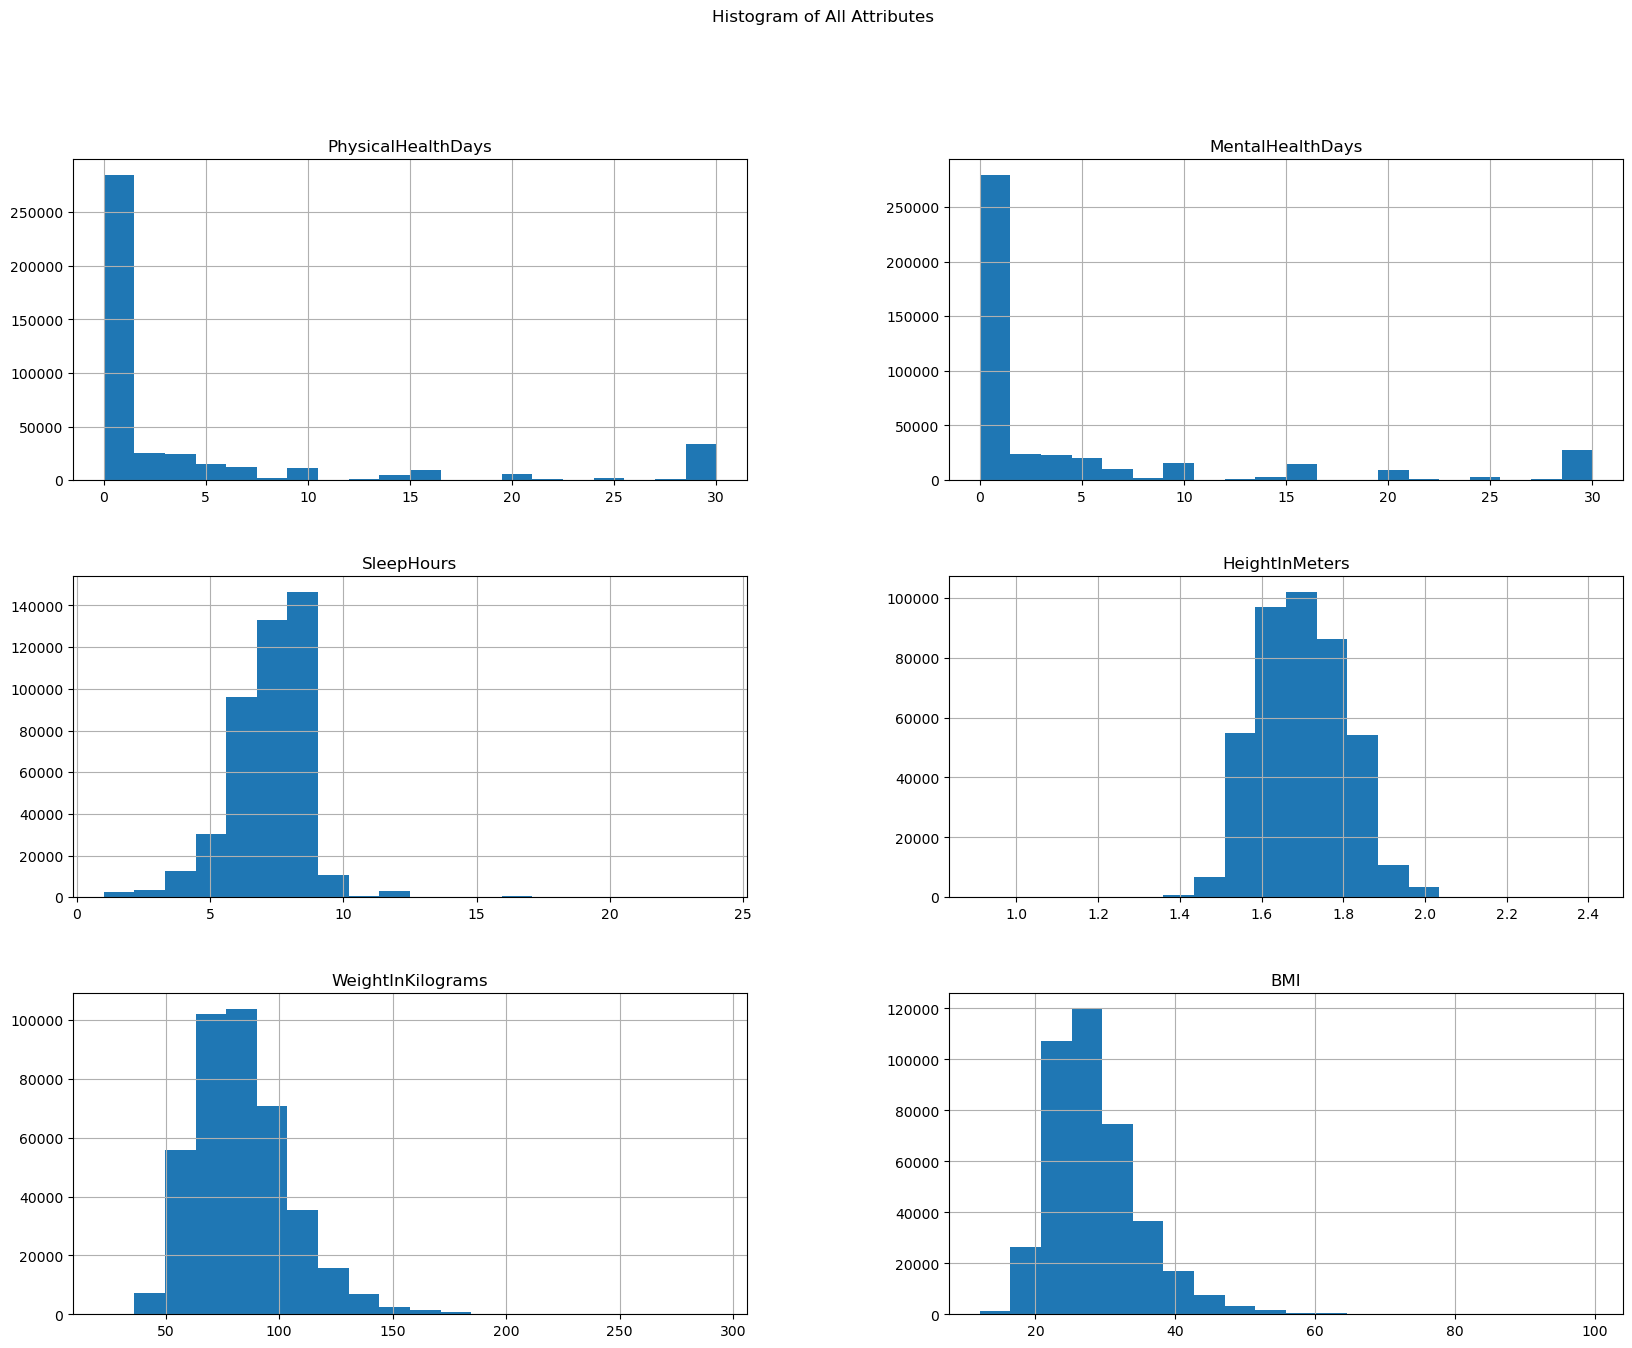

In [19]:
print("Histograms of all attributes:")
data.hist(figsize=(20, 15), bins=20)
plt.suptitle('Histogram of All Attributes')
plt.show()


## Boxplot for numerical features

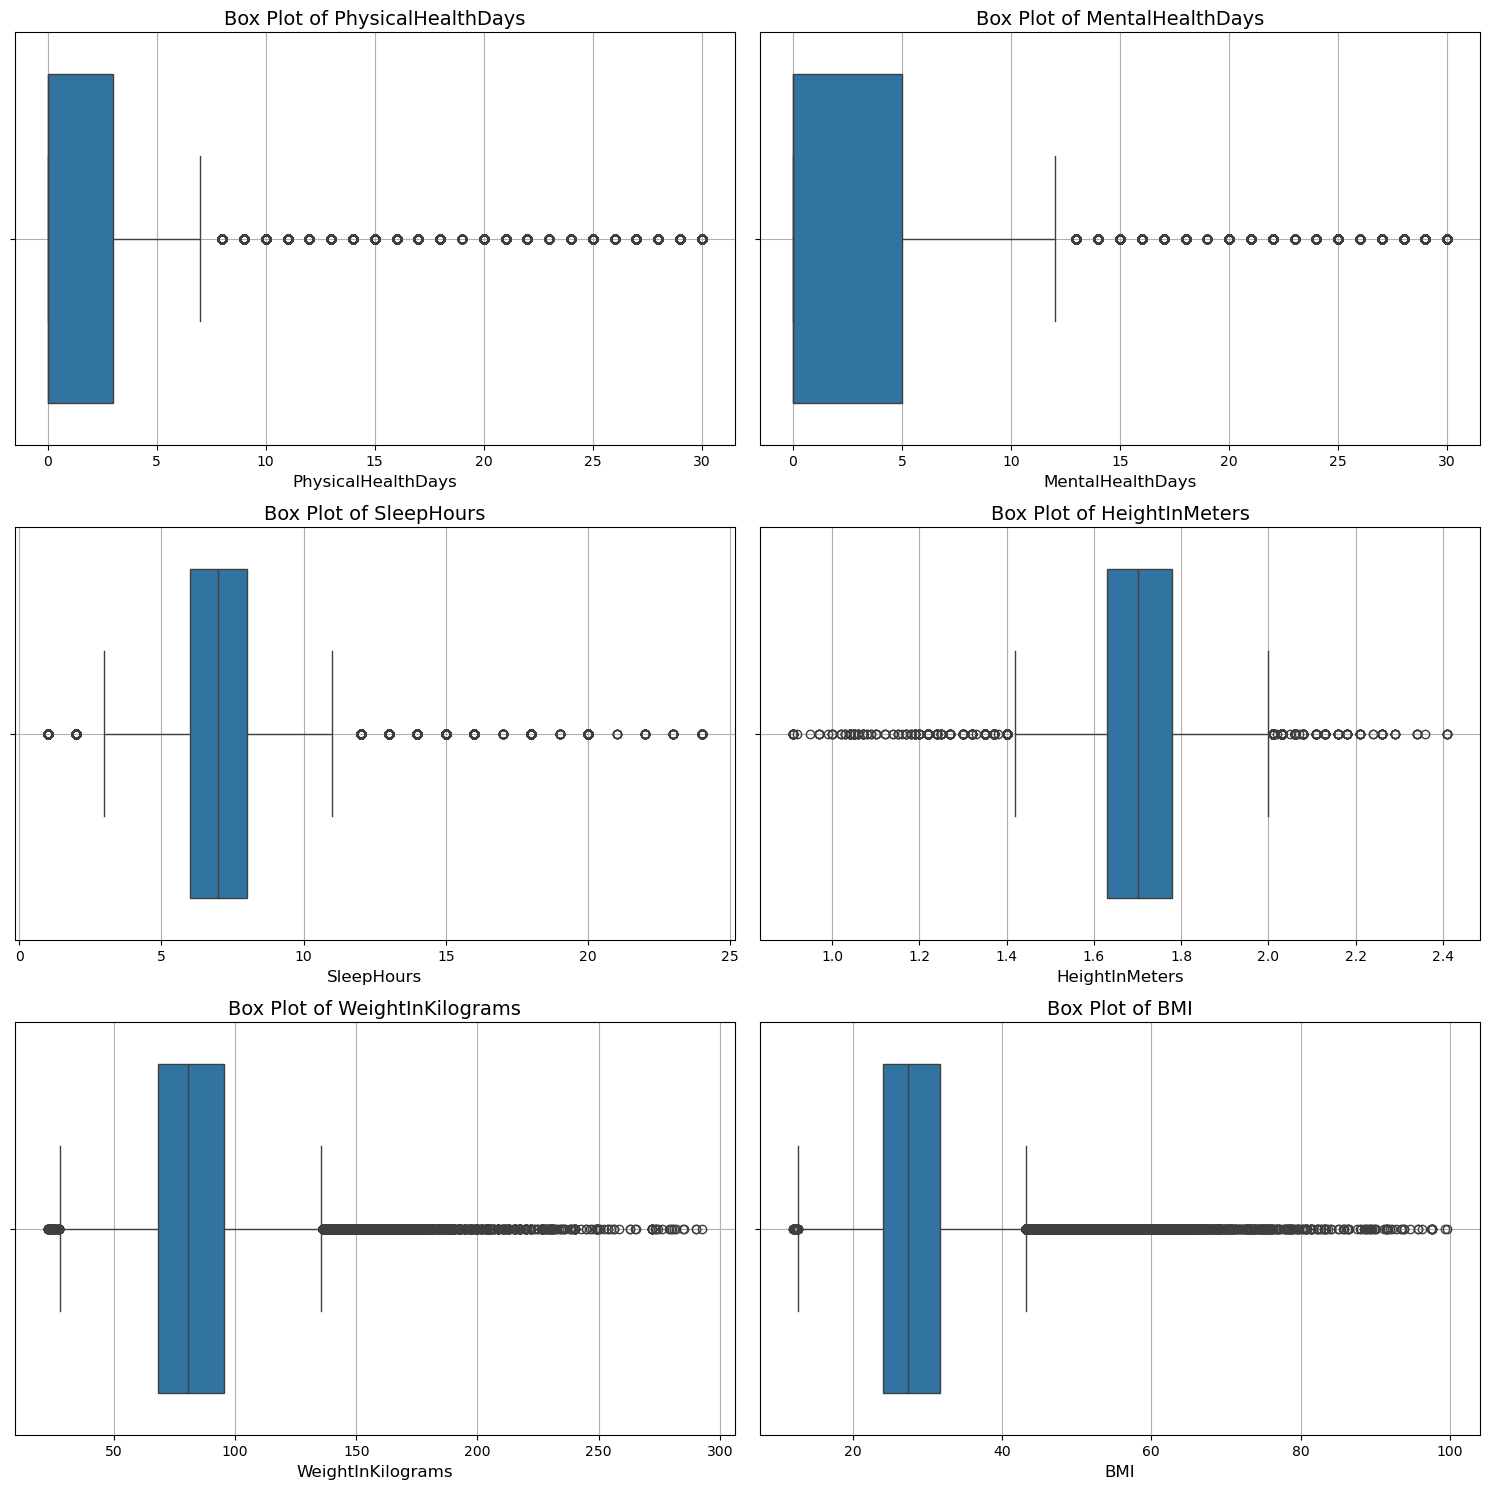

In [21]:
# Identify all numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

n_cols = 2  # Number of plots per row
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  #  number of rows

plt.figure(figsize=(15, n_rows * 5))  # Adjust the figure size based on the number of plots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()


## Barplot for categorical variable

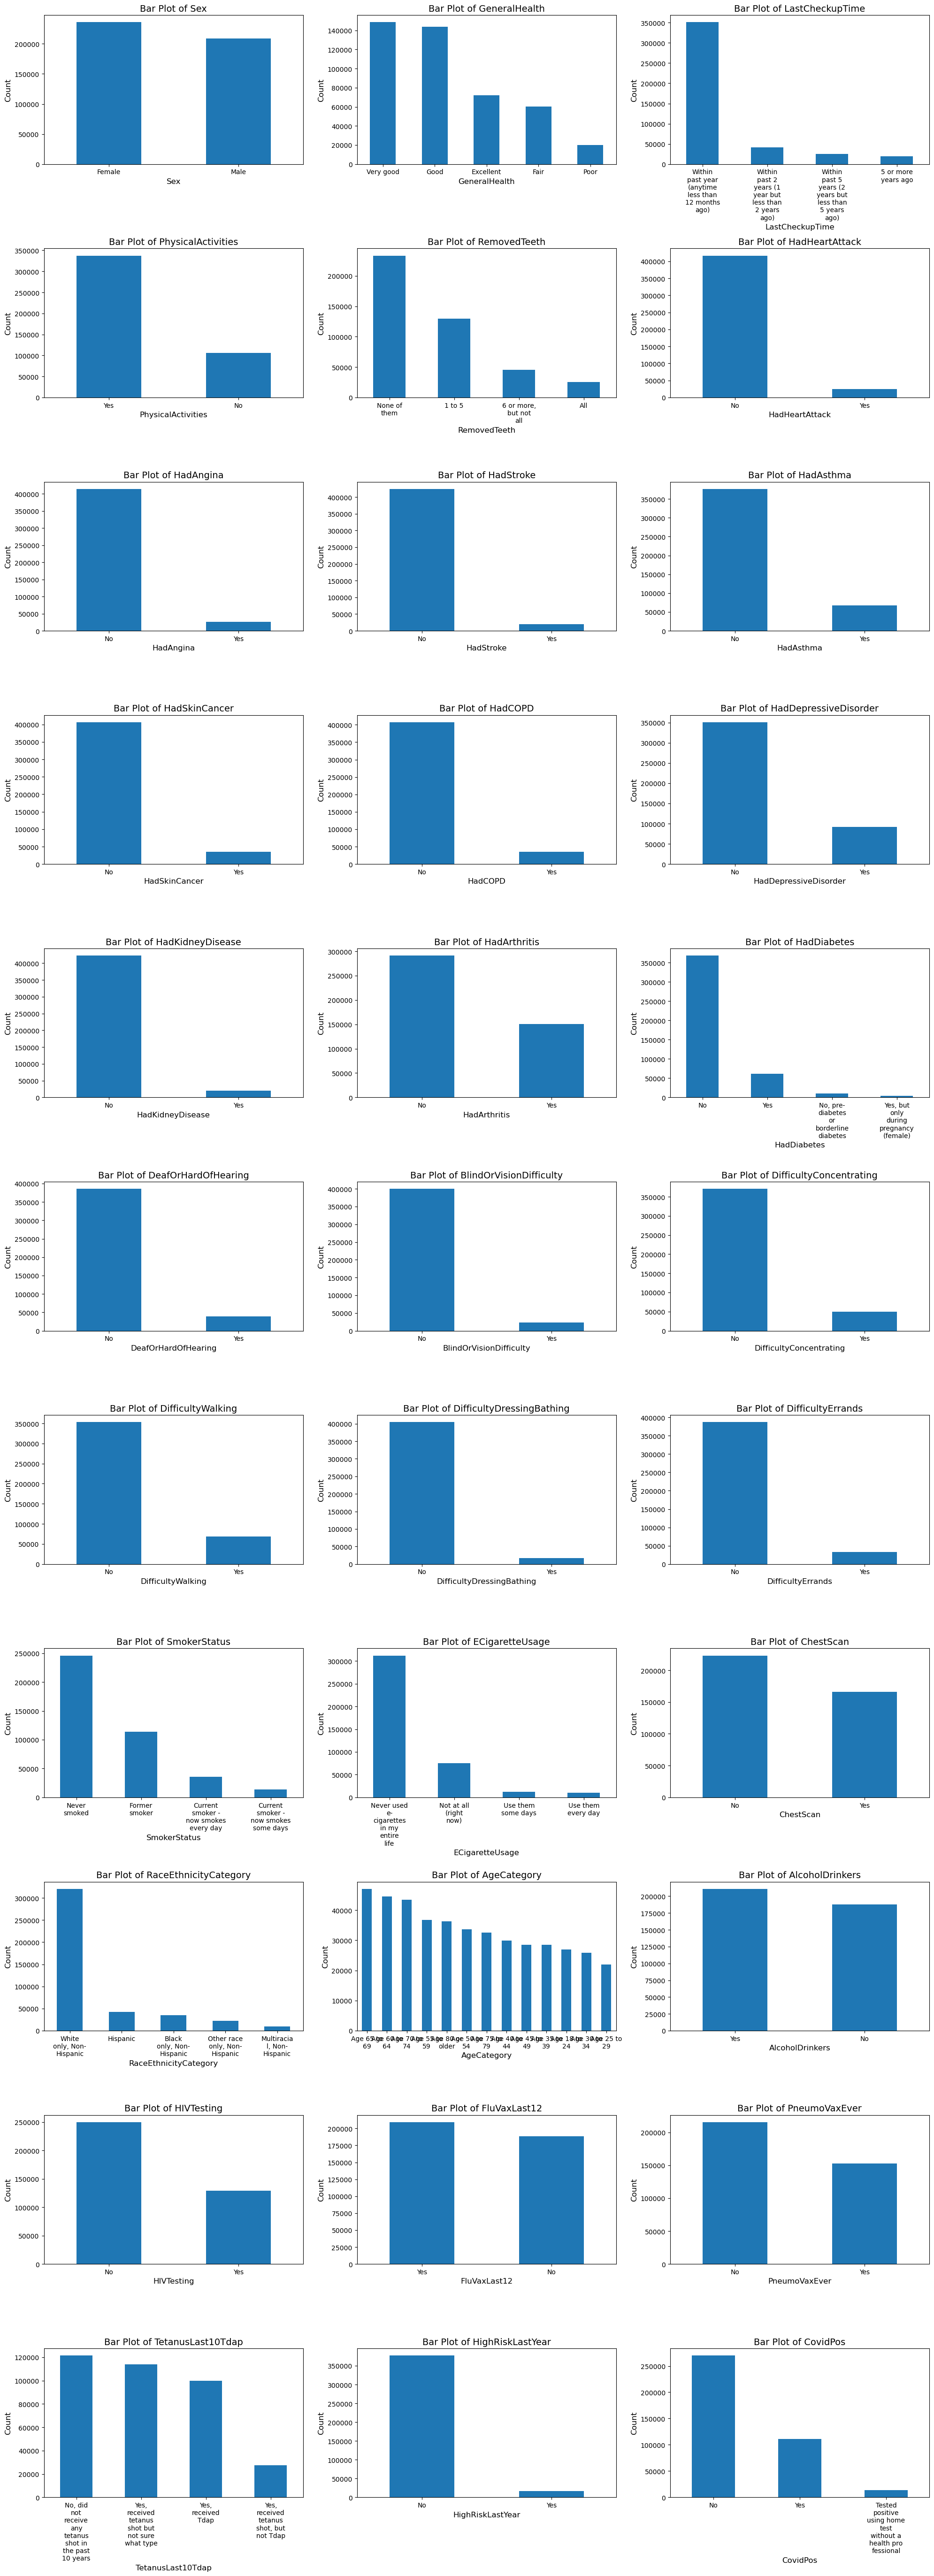

In [23]:
import matplotlib.pyplot as plt
import textwrap

# Function to wrap text labels
def wrap_labels(labels, width=10):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

# Identify all categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Exclude the 'State' column
categorical_columns = categorical_columns.drop('State')

# Determine the layout size
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  #number of rows

# Create subplots
plt.figure(figsize=(20, n_rows * 5))  # Increase the figure size for better readability
for i, attr in enumerate(categorical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    counts = data[attr].value_counts()
    counts.plot(kind='bar')
    
    # Wrap text for x-ticks
    labels = wrap_labels(counts.index)
    plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0, fontsize=10, ha='center')
    
    plt.title(f'Bar Plot of {attr}', fontsize=14)  # Adjust title font size
    plt.xlabel(attr, fontsize=12)  # Adjust label font size
    plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()


## Barplot of State Distribution

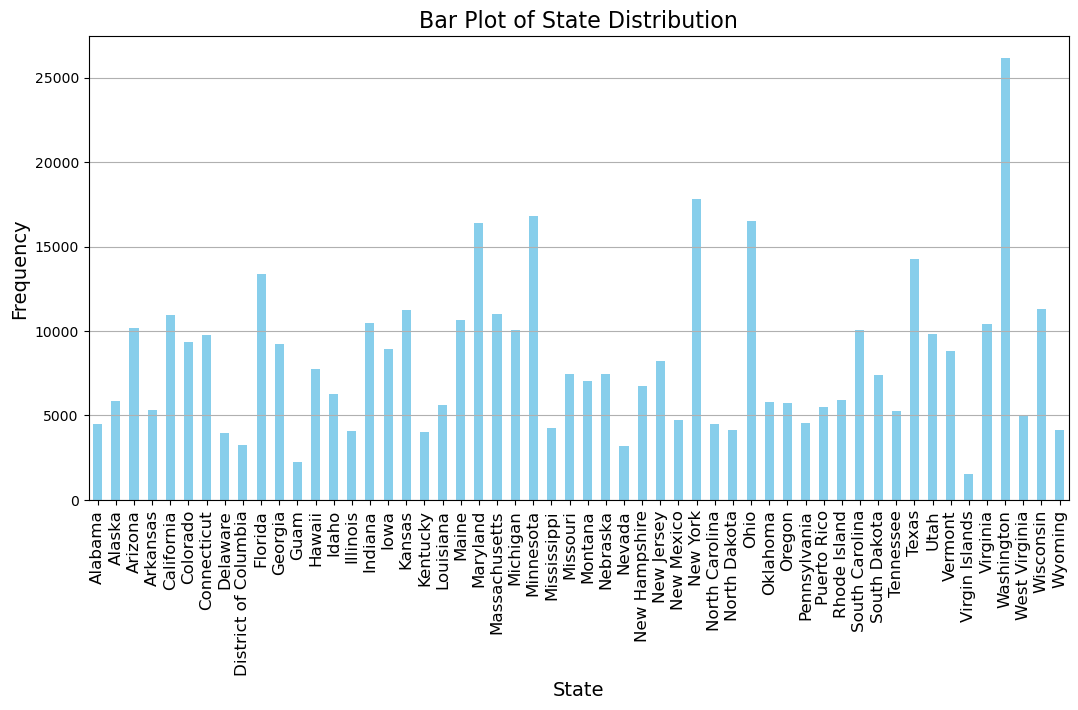

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the value counts for the 'State' column
state_counts = data['State'].value_counts().sort_index()

# Create a bar plot for the 'State' column
plt.figure(figsize=(14, 8))
state_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Plot of State Distribution', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.grid(axis='y')


plt.subplots_adjust(left=0.2, bottom=0.3)  # Adjust the plot to fit the table
plt.show()


## Distribution of BMI by Heart Attack Status

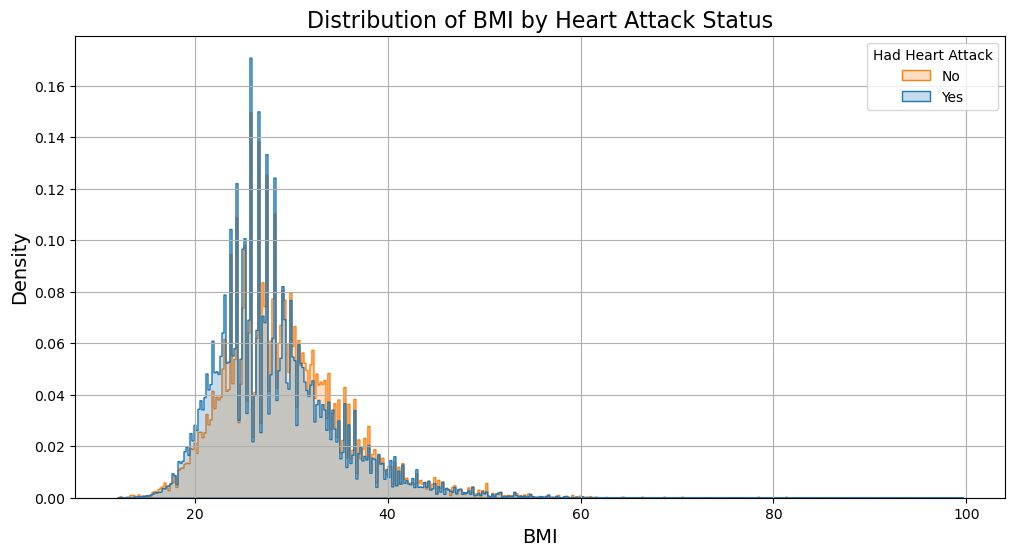

In [27]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='BMI', hue='HadHeartAttack', element='step', stat='density', common_norm=False)
plt.title('Distribution of BMI by Heart Attack Status', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Had Heart Attack', labels=['No', 'Yes'])
plt.grid(True)

plt.show()


## Pie Chart of Sex, General Health, and Heart Attack Cases

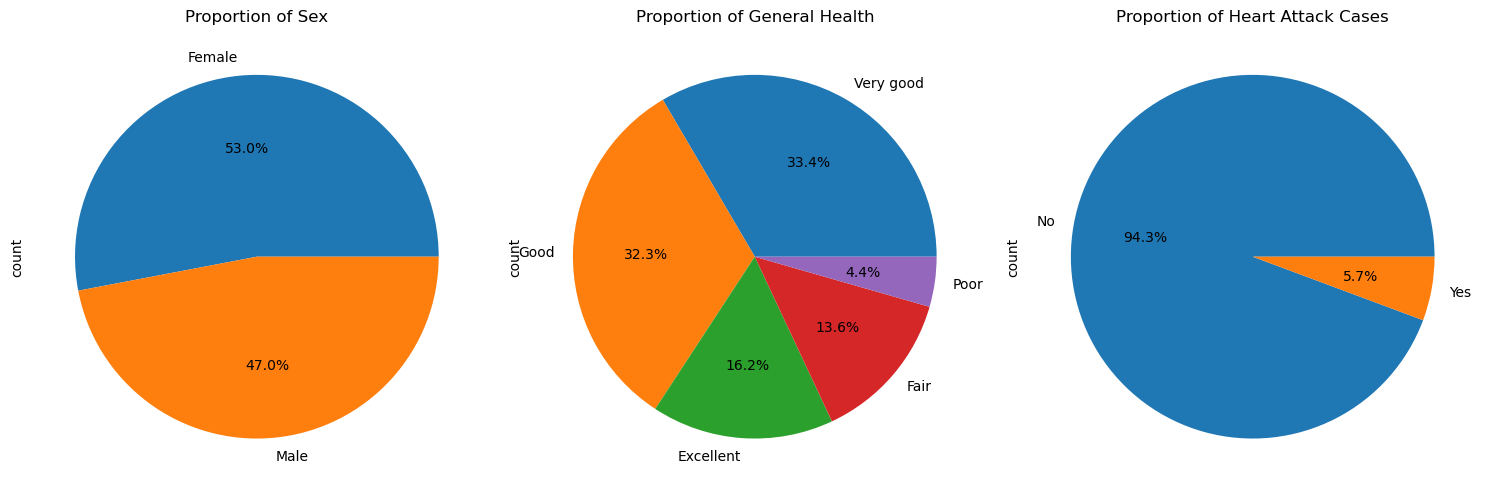

In [29]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)

data['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Sex')

plt.subplot(1, 3, 2)
data['GeneralHealth'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of General Health')

plt.subplot(1, 3, 3)
data['HadHeartAttack'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Heart Attack Cases')

plt.tight_layout()
plt.show()


## Barplots for missing value


C:\Users\Zizhuo Zhang\AppData\Local\Temp\ipykernel_47756\3644838671.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missing_values_heart, y='Column', x='MissingValues', orient='h', palette="viridis")


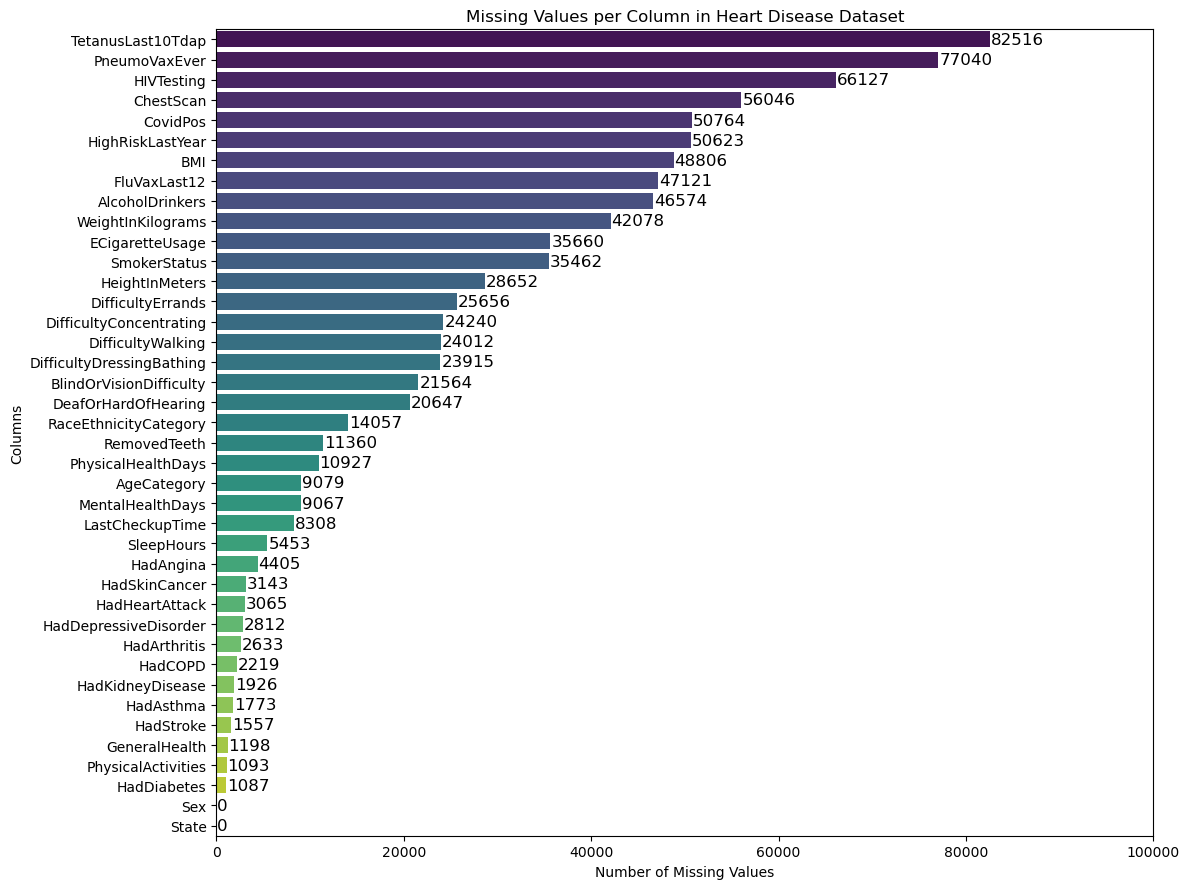

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate missing values
missing_values = data.isnull().sum()

# Convert the missing values to a DataFrame for plotting
missing_values_heart = missing_values.reset_index()
missing_values_heart.columns = ['Column', 'MissingValues']

# Sort the DataFrame by MissingValues
missing_values_heart = missing_values_heart.sort_values(by='MissingValues', ascending=False)

# Plot the missing values
plt.figure(figsize=(12, 9))
sns.barplot(data=missing_values_heart, y='Column', x='MissingValues', orient='h', palette="viridis")
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Values per Column in Heart Disease Dataset')
plt.xlim(0, 100000)  # Adjust the x-axis limit as needed

# Add text labels above each bar
for index, value in enumerate(missing_values_heart['MissingValues']):
    plt.text(value + 100, index, f'{value}', va='center', fontsize=12, color='black')  # Adjust text position

plt.tight_layout()
plt.show()


##  Correlation Matrix for Numerical Values

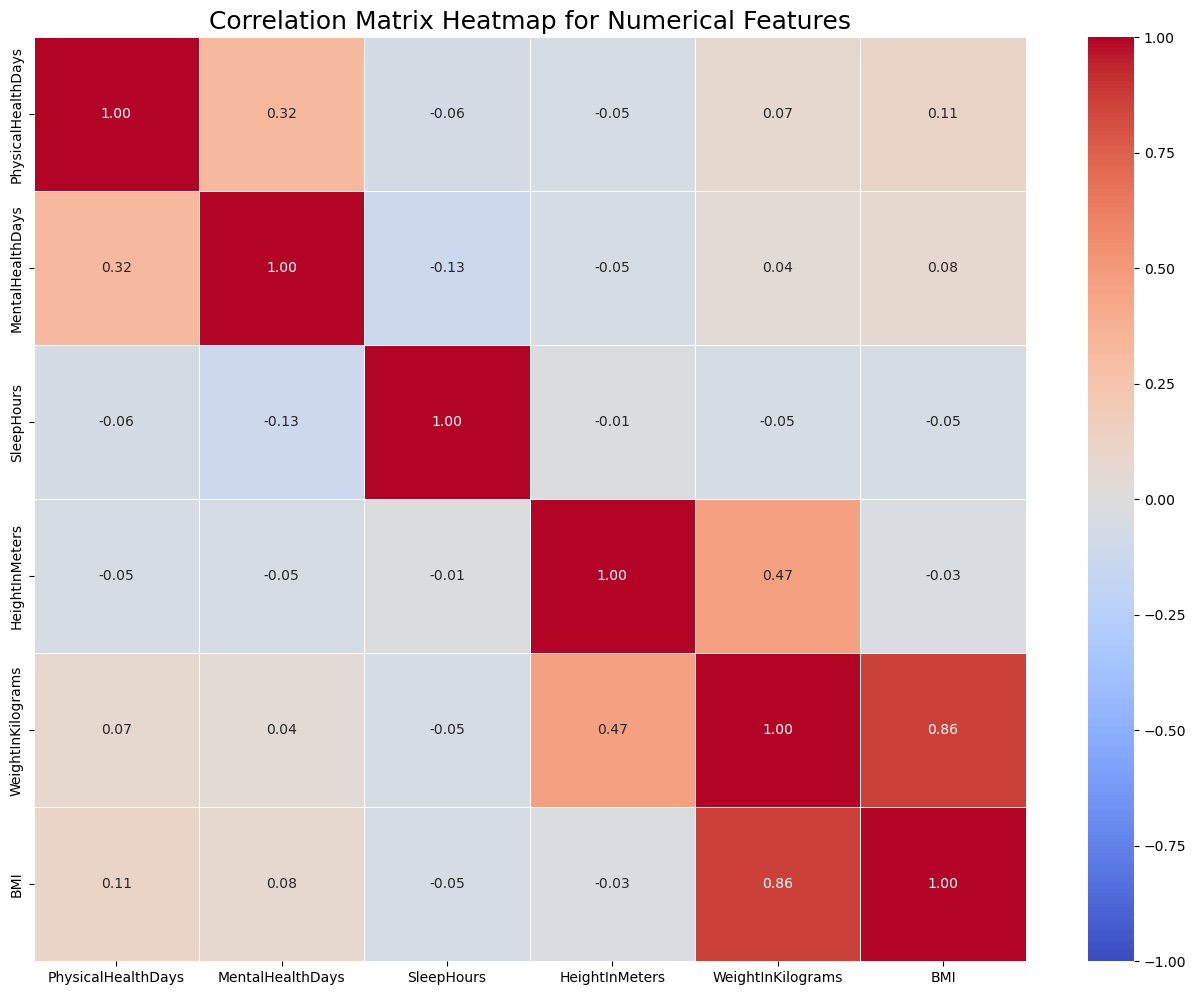

In [33]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.title('Correlation Matrix Heatmap for Numerical Features', fontsize=18)
plt.show()


## Correlation Matrix for Categorical Features (Converted To Binary Representations)

**Note**: 
- An encoding criteria determines how to convert postive aligned values as positive in one-hot encoding process.
  - These were values having `yes`, `positive`, `smokes`, `uses` and `some`. 
- Non-binary (in terms of converting to positive and negative) attributes were omitted from the representation. These were:
  - State
  - Sex
  - AgeCategory
  - GeneralHealth
  - LastCheckupTime
  - RemovedTeeth
  - RaceEthinicityCategory
- Correlations over 0.3 has been highlighted for readability

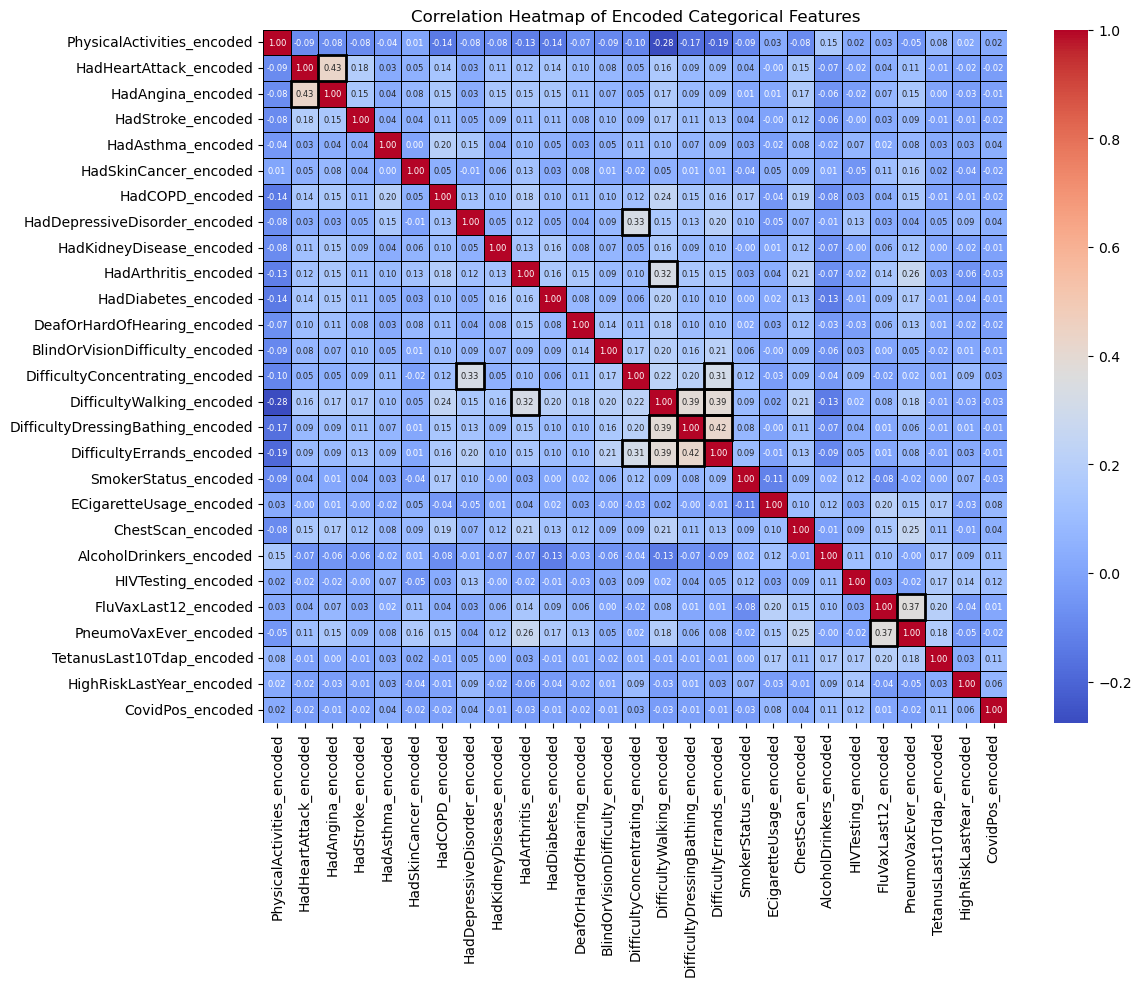

In [36]:
def encode_feature(value):
    positive_criteria = ['yes', 'positive', 'smokes', 'use', 'some']
    if isinstance(value, str):
        return int(any(criteria in value.lower() for criteria in positive_criteria))
    return 0

categorical_features = data.select_dtypes(include=['object']).columns
exclude_features = ['State', 'Sex', 'AgeCategory', 'GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'RaceEthnicityCategory'] + list(data.select_dtypes(include=['int64', 'float64']).columns)
categorical_features = [feature for feature in categorical_features if feature not in exclude_features]

for feature in categorical_features:
    data[feature + '_encoded'] = data[feature].apply(encode_feature)

encoded_features = [feature + '_encoded' for feature in categorical_features]
corr_matrix = data[encoded_features].corr()

plt.figure(figsize=(12, 9))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 6}, linecolor='black', fmt='.2f')

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        value = corr_matrix.iloc[i, j]
        if abs(value) > 0.3 and abs(value) < 1:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=2))

plt.title('Correlation Heatmap of Encoded Categorical Features')
plt.show()


# Data Pre-processing


## Check for missing data

In [39]:
origin_data = pd.read_csv('heart_2022_with_nans.csv')
data = origin_data

missing_data_count = data.isnull().sum()
missing_data_percentage = (missing_data_count / len(data)) * 100
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_data_count,
    'Percentage': missing_data_percentage
})
missing_data_summary

,Missing Values,Percentage
State,0,0.000000
Sex,0,0.000000
GeneralHealth,1198,0.269134
PhysicalHealthDays,10927,2.454777
MentalHealthDays,9067,2.036924
LastCheckupTime,8308,1.866413
PhysicalActivities,1093,0.245545
SleepHours,5453,1.225030
RemovedTeeth,11360,2.552052
HadHeartAttack,3065,0.688560


## Handle Missing Value

1. Mode Imputation
- Missing data from the following list of attributes will be addressed using mode imputation, where the most frequent value is used to fill in the gaps. This method is particularly effective as the missing proportions are minimal, which allows the original distribution and consistency of the data to be maintained.
    - **GeneralHealth** (0.27%)
    - **LastCheckupTime** (1.87%)
    - **PhysicalActivities** (0.25%)
    - **RemovedTeeth** (2.55%)
    - **HadHeartAttack** (0.69%)
    - **HadAngina** (0.99%)
    - **HadStroke** (0.35%)
    - **HadAsthma** (0.40%)
    - **HadSkinCancer** (0.71%)
    - **HadCOPD** (0.50%)
    - **HadDepressiveDisorder** (0.63%)
    - **HadKidneyDisease** (0.43%)
    - **HadArthritis** (0.59%)
    - **HadDiabetes** (0.24%)
    - **AgeCategory** (2.04%)
2. Median Imputation
- Missing data from the following features will be replaced with the median value. This method effective for handling levels of missing data in the numerical features, as it preserves the central tendency and is robust to outliers:
    - **PhysicalHealthDays** (2.45%)
    - **MentalHealthDays** (2.04%)
    - **SleepHours** (1.23%)
3. Separate Category for Missing Values
- For categorical attributes where missingness may carry significant information, their missing values will be treated as a separate category. This helps to preserve the missingness information and maintains the potential influence of missing values.
    - **RaceEthnicityCategory** (3.16%)
    - **DeafOrHardOfHearing** (4.61%)
    - **BlindOrVisionDifficulty** (4.81%)
    - **DifficultyConcentrating** (5.41%)
    - **SmokerStatus** (7.94%)
    - **ECigaretteUsage** (7.98%)
    - **AlcoholDrinkers** (10.43%)
    - **HighRiskLastYear** (11.34%)
    - **CovidPos** (11.38%)
4. Imputation Using Other Attributes
- **Categorical Imputation:**
    - Values from other attributes could be used to replace missing data if correlation between two attributes exists. This dataset is considerably large, so even weak correlations can bring statistical significance.
    - **Criteria:** Correlation over 0.35, if multiple correlations exists, the strongest one is priorised.
    
    **Relevant Correlations:**
    
    - `HadAngina_encoded` and `HadHeartAttack_encoded`: Correlation = 0.428
    - `DifficultyDressingBathing_encoded` and `DifficultyWalking_encoded`: Correlation = 0.392
    - `DifficultyErrands_encoded` and `DifficultyWalking_encoded`: Correlation = 0.392
    - `DifficultyErrands_encoded` and `DifficultyDressingBathing_encoded`: Correlation = 0.421
    - `PneumoVaxEver_encoded` and `FluVaxLast12_encoded`: Correlation = 0.371
- **Numerical Imputation**
    - **Calculate BMI using Weight and Height:**
        - Formula: `BMI = WeightInKilograms / (HeightInMeters ** 2)`
        - If `BMI` is missing but `WeightInKilograms` and `HeightInMeters` are available, compute `BMI` using the formula.
    - **Calculate Weight using BMI and Height:**
        - Formula: `WeightInKilograms = BMI * (HeightInMeters ** 2)`
        - If `WeightInKilograms` is missing but `BMI` and `HeightInMeters` are available, compute `WeightInKilograms` using the formula.
    - **Calculate Height using BMI and Weight:**
        - Formula: `HeightInMeters = sqrt(WeightInKilograms / BMI)`
        - If `HeightInMeters` is missing but `BMI` and `WeightInKilograms` are available, compute `HeightInMeters` using the formula.
    - If above methods are not possible due to multiple missing values, values will be replaced using the mean or median of correlated attributes if the correlation between attributes is significant.
    - **Criteria:** Correlation over 0.35
    
    **Relevant Correlations:**
    
    - `WeightInKilograms` and `HeightInMeters`: Correlation = 0.47
    - `BMI` and `WeightInKilograms`: Correlation = 0.85
5. Dropped Attributes
- The following attributes will be dropped due to their significant missing percentage and no suitable imputation methods.
    - **ChestScan** (12.56%)
    - **HIVTesting** (14.83%)
    - **TetanusLast10Tdap** (18.51%)
    - **PneumoVaxEver** (17.28%)   - **TetanusLast10Tdap** (18.51%)
    - **PneumoVaxEver** (17.28%)   - **TetanusLast10Tdap** (18.51%)
    - **PneumoVaxEver** (17.28%)

In [41]:
import numpy as np
from tqdm import tqdm 

# 1. Mode Imputation
mode_impute_cols = [
    'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth',
    'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'AgeCategory'
]

for col in mode_impute_cols:
    mode_value = data[col].mode()[0]
    data[col] = data[col].fillna(mode_value)

# 2. Median Imputation
median_impute_cols = [
    'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours'
]

for col in median_impute_cols:
    median_value = data[col].median()
    data[col] = data[col].fillna(median_value)

# 3. Separate Category for Missing Values
separate_category_cols = [
    'RaceEthnicityCategory', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
    'DifficultyConcentrating', 'SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers',
    'HighRiskLastYear', 'CovidPos'
]

for col in separate_category_cols:
    data[col] = data[col].fillna('Missing')

# 4. Imputation Using Other Attributes

# Impute categorical data based on correlations, fallback to mode if correlation fails
correlation_map = {
    'HadAngina': 'HadHeartAttack',
    'DifficultyDressingBathing': 'DifficultyWalking',
    'DifficultyErrands': 'DifficultyWalking',
    'DifficultyWalking': 'DifficultyErrands',
    'DifficultyErrands': 'DifficultyDressingBathing',
    'PneumoVaxEver': 'FluVaxLast12',
    'FluVaxLast12': 'PneumoVaxEver',
}

for col_to_impute, correlated_col in correlation_map.items():
    if col_to_impute in data.columns and correlated_col in data.columns:
        # Determine the mode for fallback
        mode_value_to_impute = data[col_to_impute].mode()[0]
        
        # Impute using correlated column where available
        # Use correlated column value if it exists
        data[col_to_impute] = data.apply(
            lambda row: row[correlated_col] if pd.isna(row[col_to_impute]) and not pd.isna(row[correlated_col]) else row[col_to_impute],
            axis=1
        )
        
        # If both are missing, fallback to mode of the column to be imputed
        data[col_to_impute] = data[col_to_impute].fillna(mode_value_to_impute)

# Numerical Imputation with Chunk Processing and Progress Bar
def calculate_missing_values(df, chunk_size=100):
    # Function to impute missing values in chunks
    def impute_chunk(chunk_df):
        # Calculate BMI if missing
        if 'BMI' in chunk_df.columns:
            if chunk_df['BMI'].isna().any():
                if 'WeightInKilograms' in chunk_df.columns and 'HeightInMeters' in chunk_df.columns:
                    missing_bmi_idx = chunk_df[chunk_df['BMI'].isna()].index
                    chunk_df.loc[missing_bmi_idx, 'BMI'] = chunk_df.loc[missing_bmi_idx, 'WeightInKilograms'] / (chunk_df.loc[missing_bmi_idx, 'HeightInMeters'] ** 2)
        
        # Calculate Weight if missing
        if 'WeightInKilograms' in chunk_df.columns:
            if chunk_df['WeightInKilograms'].isna().any():
                if 'BMI' in chunk_df.columns and 'HeightInMeters' in chunk_df.columns:
                    missing_weight_idx = chunk_df[chunk_df['WeightInKilograms'].isna()].index
                    chunk_df.loc[missing_weight_idx, 'WeightInKilograms'] = chunk_df.loc[missing_weight_idx, 'BMI'] * (chunk_df.loc[missing_weight_idx, 'HeightInMeters'] ** 2)

        # Calculate Height if missing
        if 'HeightInMeters' in chunk_df.columns:
            if chunk_df['HeightInMeters'].isna().any():
                if 'BMI' in chunk_df.columns and 'WeightInKilograms' in chunk_df.columns:
                    missing_height_idx = chunk_df[chunk_df['HeightInMeters'].isna()].index
                    chunk_df.loc[missing_height_idx, 'HeightInMeters'] = np.sqrt(chunk_df.loc[missing_height_idx, 'WeightInKilograms'] / chunk_df.loc[missing_height_idx, 'BMI'])
        
        # Recalculate and impute remaining missing values
        numerical_impute_cols = ['WeightInKilograms', 'HeightInMeters', 'BMI']
        for col in numerical_impute_cols:
            if col in chunk_df.columns:
                if chunk_df[col].isna().any():
                    mean = chunk_df[col].mean()
                    chunk_df.loc[:, col] = chunk_df[col].fillna(mean)
        
        return chunk_df

    # Initialize progress bar
    num_chunks = int(np.ceil(len(df) / chunk_size))
    
    # Process data in chunks
    for start in tqdm(range(0, len(df), chunk_size), total=num_chunks, desc="Processing chunks"):
        end = min(start + chunk_size, len(df))
        chunk_df = df.iloc[start:end].copy()  # Ensure chunk is a copy
        chunk_df = impute_chunk(chunk_df)
        
        # Update the main DataFrame with the processed chunk
        df.iloc[start:end] = chunk_df
        

# Call the function to impute missing values
calculate_missing_values(data)

# 5. Dropped Attributes
dropped_attributes = [
    'ChestScan', 'HIVTesting', 'TetanusLast10Tdap', 'PneumoVaxEver'
]

data = data.drop(columns=dropped_attributes)

missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})

print("Missing value handling is complete.")
missing_summary

Processing chunks: 100%|███████████████████████████████████████████████████████████| 4452/4452 [01:20<00:00, 55.32it/s]


Missing value handling is complete.


,Missing Values,Percentage
State,0,0.0
Sex,0,0.0
GeneralHealth,0,0.0
PhysicalHealthDays,0,0.0
MentalHealthDays,0,0.0
LastCheckupTime,0,0.0
PhysicalActivities,0,0.0
SleepHours,0,0.0
RemovedTeeth,0,0.0
HadHeartAttack,0,0.0


## Check for duplicates

Duplicates can skew statistical results, introduce bias, and lead to overfitting in machine learning models. By removing duplicates, it can improve the quality of the dataset and make sure that each observation is unique.

In [43]:
duplicates = data.duplicated().sum()
duplicates

41

In [44]:
# Drop duplicate rows
data = data.drop_duplicates()


data.to_csv('processed_data.csv', index=False)

## Checking for outliers using Z-score

The Z-score is a statistical measure that indicates how far a data point deviates from the mean of the dataset. According to the Empirical Rule (68-95-99.7 Rule), in a normal distribution, about 99.7% of the data falls within 3 standard deviations from the mean. Therefore, a data point with a Z-score greater than 3 or less than -3 is typically considered an outlier because it lies outside this range

In [47]:
from scipy import stats

z_scores = stats.zscore(data.select_dtypes(include=['float64', 'int64']))
abs_z_scores = pd.DataFrame(abs(z_scores), columns=data.select_dtypes(include=['float64', 'int64']).columns)
outliers = (abs_z_scores > 3).sum()
total_observations = data.shape[0]
outliers_percentage = (outliers / total_observations) * 100
outliers_summary = pd.DataFrame({
    'Outliers Count': outliers,
    'Outliers Percentage': outliers_percentage
})

print("Outliers per feature (Z-score > 3):\n", outliers_summary)

Outliers per feature (Z-score > 3):
                     Outliers Count  Outliers Percentage
PhysicalHealthDays               0             0.000000
MentalHealthDays             26990             6.063929
SleepHours                    7260             1.631127
HeightInMeters                1000             0.224673
WeightInKilograms             5070             1.139093
BMI                           5995             1.346916


### Interpretation
1. `PhysicalHealthDays` and `MentalHealthDays`

Given the extreme right-skewness of `PhysicalHealthDays` and `MentalHealthDays`, where most respondents report values close to 0 or 30, the Z-score method for outlier detection is unsuited. This method assumes normal distribution of data, which does not apply to these highly skewed features. In the context of these features, extreme values are expected as they reflect individuals either engage extensively in physical activity or receive extensive mental health treatment, with few reporting moderate levels, or nothing at all. Thus, the outliers identified are likely representative of the natural distribution and do not require removal or modification

2. `SleepHours`

`SleepHours` also displays significant skewness. Given the context, these extreme values could be part of the variable natural sleep pattern, which is reflective of individual differences in lifestyles. These outliers should be kept in the dataset as they can carry meaningful information regarding the person's lifestyle choices.


3. `HeightInMeters`, `WeightInKilograms`, and `BMI`

`HeightInMeters`, `WeightInKilograms`, and `BMI` are approximately normally distributed with only minor skews. These data have interrelationships with each other as indicated in Section 2.9, which justifies their similar outlier percentages. `BMI` also has shown some relevance in heart attack cases as indicated in Section 2.5. Given that heart disease cases are the primary focus of this project, these outliers are likely to be meaningful and reflective of real variability in the dataset. Therefore, these features should be maintained in the dataset without modification.